In [1]:
using Distributions
using Random
using LinearAlgebra
using LegendrePolynomials
using SpecialPolynomials
using ForwardDiff

using PyPlot
PyPlot.svg(true)
using Seaborn

In [2]:
include("../targets.jl")
include("../eigenvi.jl")
include("../bam.jl")

include("../variational_families.jl")
include("../polynomials.jl")

DNHP (generic function with 1 method)

In [3]:
# Use the normalized Hermite variational family
basis_fn = NHP
d_basis_fn = DNHP
D = 2

2

# Non-axis aligned GMM

In [4]:
Σ = 2*Matrix(0.25*I, D, 2); Σ[1,2] = Σ[2,1] = 0.1

P, logP, dlogP = get_gmm3([-1,1], [1.1,1.1], [-1,-1], 0.5*I, I, I, 0.4, 0.3)

(P, logP, dlogP)

In [5]:
Kfull1 = 4
Kfull2 = 8

# Sample and evaluate scores
N = 2000
σ = 4
# sample 
X = rand(MultivariateNormal(zeros(D),σ*I), N)
# Proposal
logPi(x) = logpdf(MultivariateNormal(zeros(D), σ*I), x)
scores = reduce(hcat,[dlogP(X[:,n]) for n in 1:N])

# Compare small and large
@time α_hat_full1, W, objective = eigenVI_2D(Kfull1, X, scores, basis_fn, d_basis_fn; grads=true, denom=true, arpack=false, logPi=logPi);
q_full1(x) = q_full(x, α_hat_full1, Kfull1, basis_fn)
println(objective)

@time α_hat_full2, W, objective = eigenVI_2D(Kfull2, X, scores, basis_fn, d_basis_fn; grads=true, denom=true, arpack=false, logPi=logPi);
q_full2(x) = q_full(x, α_hat_full2, Kfull2, basis_fn)
println(objective)

  1.355153 seconds (5.46 M allocations: 406.773 MiB, 4.52% gc time, 95.54% compilation time)
0.0518512718757065
  0.232145 seconds (3.16 M allocations: 788.006 MiB, 16.29% gc time)
0.004544946832285731


In [6]:
# Fit a Gaussian variational approximation
T=6000; D=2; B=10
μ_init = randn(D); Σ_init = Matrix(I, D, D)
λ_function(t) = B*D/(t+1)

@time μs, Σs = bam(T, B, μ_init, Σ_init, λ_function, dlogP)
q_gauss(x) = pdf(MultivariateNormal(μs[T], Σs[T]), x)

  6.472660 seconds (22.91 M allocations: 1.389 GiB, 4.65% gc time, 91.72% compilation time)


q_gauss (generic function with 1 method)

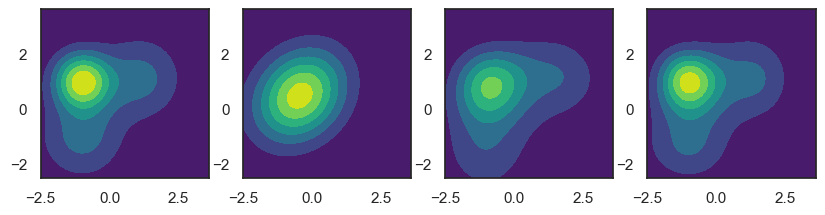

In [7]:
vmax = 0.14

Seaborn.set_theme(style="white")
cmap = "viridis"

figure(figsize=(10,4))

ax = subplot(141)
xx = -2.5:0.1:3.6; lenxx = length(xx)
zz = reshape([P([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_target = contourf(xx, xx, zz, vmin=0, vmax=vmax, levels=6, cmap=cmap)
ax.set_aspect("equal")

ax = subplot(142)
qq = reshape([q_gauss([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_fact = contourf(xx, xx, qq, vmin=0,  vmax=vmax, levels=6, cmap=cmap)
cf2, _ = c_fact.legend_elements()
ax.set_aspect("equal")

ax = subplot(143)
qq = reshape([q_full1([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_orth = contourf(xx, xx, qq, vmin=0, vmax=vmax, levels=6, cmap=cmap) 
co1, _ = c_orth.legend_elements()
ax.set_aspect("equal")

ax = subplot(144)

qq = reshape([q_full2([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_orth = contourf(xx, xx, qq, vmin=0,  vmax=vmax, levels=6, cmap=cmap)
co2, _ = c_orth.legend_elements()
ax.set_aspect("equal")

# Funnel

In [8]:
figure(figsize=(4,4))
P, logP, dlogP = get_funnel(1.2, 2)

(P, logP, dlogP)

In [9]:
# Fit a multivariate Gaussian with score matching
T=6000; D=2; B=10
μ_init = randn(D); Σ_init = Matrix(I, D, D)
λ_function(t) = B*D/(t+1)

μs, Σs = bam(T, B, μ_init, Σ_init, λ_function, dlogP)
q_gauss(x) = pdf(MultivariateNormal(μs[T],  Σs[T]), x)

q_gauss (generic function with 1 method)

In [10]:
Kfull1 = 7
Kfull2 = 14

σ=4
N = 8000
# sample 
X = rand(MultivariateNormal(zeros(D),σ*I), N)
# Proposal
logPi(x) = logpdf(MultivariateNormal(zeros(D), σ*I), x)
scores = reduce(hcat,[dlogP(X[:,n]) for n in 1:N])

# Compare small and large
@time α_hat_full1, W, objective = eigenVI_2D(Kfull1, X, scores, basis_fn, d_basis_fn; grads=true, denom=true, arpack=false, logPi=logPi);
q_full1(x) = q_full(x, α_hat_full1, Kfull1, basis_fn)
println(objective)

@time α_hat_full2, W, objective = eigenVI_2D(Kfull2, X, scores, basis_fn, d_basis_fn; grads=true, denom=true, arpack=false, logPi=logPi);
q_full2(x) = q_full(x, α_hat_full2, Kfull2, basis_fn)
println(objective)

  0.750268 seconds (9.84 M allocations: 1.977 GiB, 18.01% gc time, 7.95% compilation time: 100% of which was recompilation)
0.203790077762189
  4.361987 seconds (37.98 M allocations: 22.583 GiB, 19.98% gc time)
0.08429546762377478


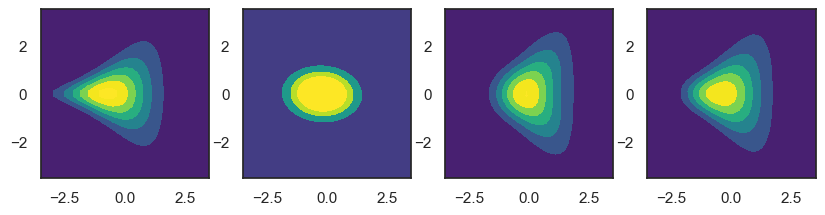

In [11]:
vmax = 0.14

figure(figsize=(10,4))

ax = subplot(141)
xx = -3.5:0.2:3.5; lenxx = length(xx)
zz = reshape([P([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_target = contourf(xx, xx, zz, vmin=0, levels=6, vmax=vmax, cmap=cmap)
ax.set_aspect("equal")

ax = subplot(142)
qq = reshape([q_gauss([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_fact = contourf(xx, xx, qq, vmin=0, levels=6, vmax=vmax, cmap=cmap)
cf2, _ = c_fact.legend_elements()
ax.set_aspect("equal")

ax = subplot(143)
qq = reshape([q_full1([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_fact = contourf(xx, xx, qq, vmin=0, levels=6, vmax=vmax, cmap=cmap)
cf2, _ = c_fact.legend_elements()
ax.set_aspect("equal")

ax = subplot(144)
qq = reshape([q_full2([x,y]) for x in xx for y in xx], (lenxx,lenxx))
c_orth = contourf(xx, xx, qq, vmin=0,levels=6, vmax=vmax, cmap=cmap)
co2, _ = c_orth.legend_elements()
ax.set_aspect("equal")